In [40]:
import matplotlib.pyplot as pl
import pandas as pd
import rules.enzymes_v04 as enz
enzymes = [item for item in dir(enz) if not item.startswith("__")]
enzymes.remove('Actin_BR')
enzymes.remove('Actin_ST')
enzymes.insert(0, 'base')

In [48]:
scenario = 'v04_Rac1_dominant'
df = pd.read_csv('reports/{}/summary.csv'.format(scenario), index_col=0)
df = df[enzymes].loc[[enz.Actin_BR, enz.Actin_ST]].transpose()

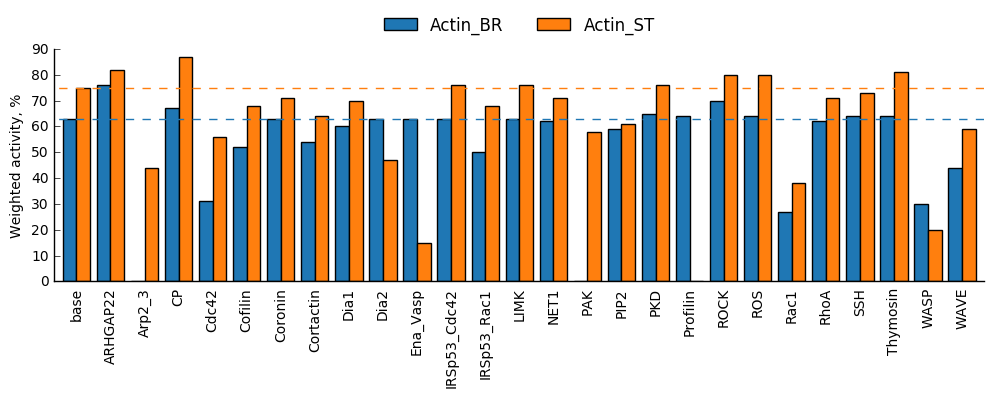

In [115]:
colors = ['#1f77b4', '#ff7f0e']
ax = df.plot.bar(figsize=(12, 3), width=0.8, color=colors)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('left')

# ax.grid(axis='y')

ax.set_ylabel('Weighted activity, %')

br, st = df.loc['base']

ax.plot([-1, 100], [br, br], linewidth=1, linestyle='--', color=colors[0])
ax.plot([-1, 100], [st, st], linewidth=1, linestyle='--', color=colors[1])

pl.savefig('charts/fig_3.png', bbox_inches='tight')
pl.savefig('charts/fig_3.svg', bbox_inches='tight')